## K Means Clustering

<img src='27.png'>

<img src='28.png'>

<img src='29.png'>

In [2]:
'''
When k=3:

1) it means 3 clusters will be there
2) and 3 centroid will be there
'''

'\nWhen k=3:\n\n1) it means 3 clusters will be there\n2) and 3 centroid will be there\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32


In [7]:
x = data.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
245,297,69
246,311,14
247,313,90
248,316,32


In [8]:
x = data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Finding the optimal no of clusters using the Elbow Method

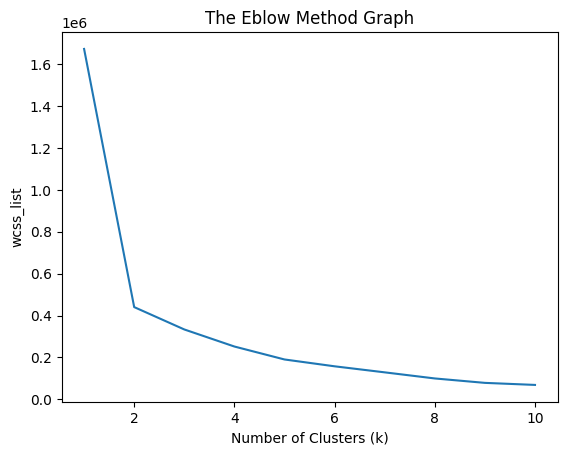

In [11]:
from sklearn.cluster import KMeans
wcss_list = [] # initiating the list for the values of wcss

# using for loop for iterations from  1 to 10
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss_list)
plt.title('The Eblow Method Graph')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('wcss_list')
plt.show()

In [12]:
'''
From the above Elbow graph,

we can see, the elbow formed at 2, so it's suggesting us to make 2 clusters (k=2)
'''

"\nFrom the above Elbow graph,\n\nwe can see, the elbow formed at 2, so it's suggesting us to make 2 clusters (k=2)\n"

<img src='30.png'>

## Clustering

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_predict = kmeans.fit_predict(x)

### Cluster 1

'\nIn above code,\n\n0 represents Annual Income\n1  represemts Spending Score\n'

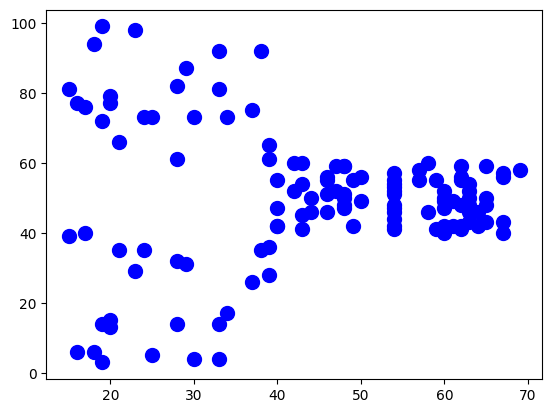

In [19]:
plt.scatter(x[y_predict == 0,0], x[y_predict ==0,1], s=100, c='blue', label='Cluster 1') # for the first cluster

'''
In above code,

0 represents Annual Income
1  represemts Spending Score
'''

In [20]:
x[y_predict == 0,0]

array([15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21,
       21, 23, 23, 24, 24, 25, 25, 28, 28, 28, 28, 29, 29, 30, 30, 33, 33,
       33, 33, 34, 34, 37, 37, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 42,
       42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46, 47, 47, 48, 48, 48, 48,
       48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60, 60, 60, 61, 61, 62, 62,
       62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64, 64, 65, 65, 65, 65, 67,
       67, 67, 67, 69])

In [23]:
x[y_predict ==0,1]

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58])

### Cluster 2

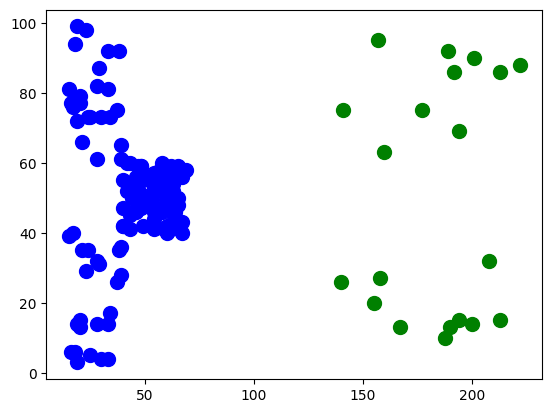

In [21]:
plt.scatter(x[y_predict == 0,0], x[y_predict ==0,1], s=100, c='blue', label='Cluster 1') # for the first cluster
plt.scatter(x[y_predict == 1,0], x[y_predict ==1,1], s=100, c='green', label='Cluster 2') # for the second cluster

In [22]:
x[y_predict == 1,0]

array([140, 141, 155, 157, 158, 160, 167, 177, 188, 189, 190, 192, 194,
       194, 200, 201, 208, 213, 213, 222])

In [24]:
x[y_predict ==1,1]

array([26, 75, 20, 95, 27, 63, 13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32,
       86, 15, 88])

### Cluster 3

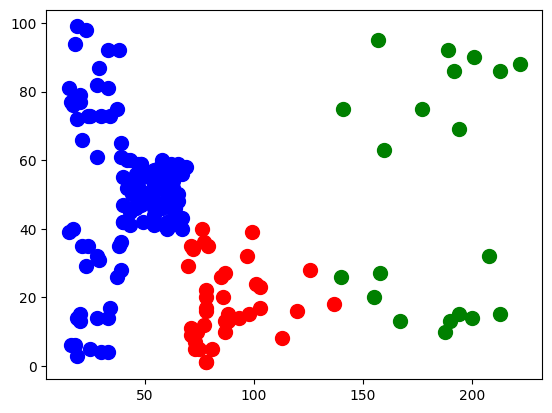

In [25]:
plt.scatter(x[y_predict == 0,0], x[y_predict ==0,1], s=100, c='blue', label='Cluster 1') # for the first cluster
plt.scatter(x[y_predict == 1,0], x[y_predict ==1,1], s=100, c='green', label='Cluster 2') # for the second cluster
plt.scatter(x[y_predict == 2,0], x[y_predict ==2,1], s=100, c='red', label='Cluster 3') # for the third cluster

In [26]:
x[y_predict == 2,0]

array([ 70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,  78,
        78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,  88,
        88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137])

In [27]:
x[y_predict == 2,1]

array([29, 35, 11,  9, 34,  5,  7, 10,  5, 40, 12, 36, 22, 17, 20, 16,  1,
        1, 35,  5, 26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,
        8, 16, 28, 18])

### Cluster 4

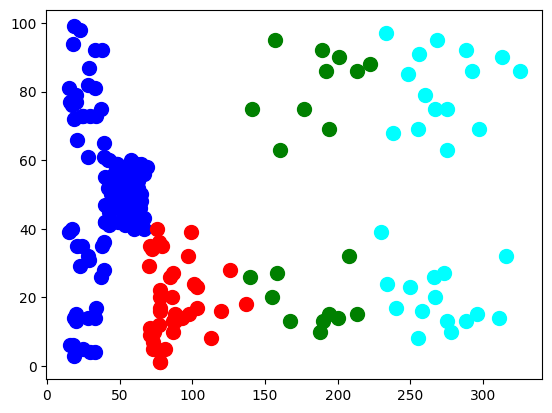

In [32]:
plt.scatter(x[y_predict == 0,0], x[y_predict ==0,1], s=100, c='blue', label='Cluster 1') # for the first cluster
plt.scatter(x[y_predict == 1,0], x[y_predict ==1,1], s=100, c='green', label='Cluster 2') # for the second cluster
plt.scatter(x[y_predict == 2,0], x[y_predict ==2,1], s=100, c='red', label='Cluster 3') # for the third cluster
plt.scatter(x[y_predict == 3,0], x[y_predict ==3,1], s=100, c='cyan', label='Cluster 3') # for the fourth cluster

In [29]:
x[y_predict == 3,0]

array([230, 233, 234, 238, 240, 248, 250, 255, 255, 256, 258, 260, 266,
       267, 267, 268, 273, 275, 275, 275, 278, 288, 288, 292, 296, 297,
       311, 313, 316, 325])

In [30]:
x[y_predict == 3,1]

array([39, 97, 24, 68, 17, 85, 23, 69,  8, 91, 16, 79, 26, 75, 20, 95, 27,
       63, 13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86])

### Cluster 5

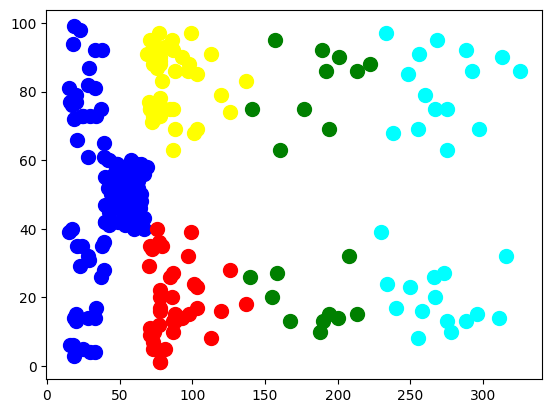

In [34]:
plt.scatter(x[y_predict == 0,0], x[y_predict ==0,1], s=100, c='blue', label='Cluster 1') # for the first cluster
plt.scatter(x[y_predict == 1,0], x[y_predict ==1,1], s=100, c='green', label='Cluster 2') # for the second cluster
plt.scatter(x[y_predict == 2,0], x[y_predict ==2,1], s=100, c='red', label='Cluster 3') # for the third cluster
plt.scatter(x[y_predict == 3,0], x[y_predict ==3,1], s=100, c='cyan', label='Cluster 3') # for the fourth cluster
plt.scatter(x[y_predict == 4,0], x[y_predict ==4,1], s=100, c='yellow', label='Cluster 3') # for the fifth cluster

In [35]:
x[y_predict == 4,0]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137])

In [36]:
x[y_predict == 4,1]

array([91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88, 76, 89,
       78, 73, 83, 93, 75, 95, 63, 75, 92, 86, 69, 90, 86, 88, 97, 68, 85,
       69, 91, 79, 74, 83])

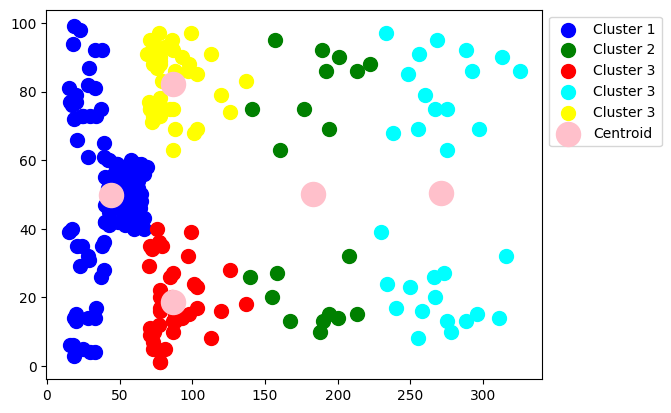

In [40]:
plt.scatter(x[y_predict == 0,0], x[y_predict ==0,1], s=100, c='blue', label='Cluster 1') # for the first cluster
plt.scatter(x[y_predict == 1,0], x[y_predict ==1,1], s=100, c='green', label='Cluster 2') # for the second cluster
plt.scatter(x[y_predict == 2,0], x[y_predict ==2,1], s=100, c='red', label='Cluster 3') # for the third cluster
plt.scatter(x[y_predict == 3,0], x[y_predict ==3,1], s=100, c='cyan', label='Cluster 3') # for the fourth cluster
plt.scatter(x[y_predict == 4,0], x[y_predict ==4,1], s=100, c='yellow', label='Cluster 3') # for the fifth cluster

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='pink', label='Centroid')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

<img src='31.png'>